In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
file ='BlackFriday.xlsx'
bf = pd.read_excel(file)plt.rcParams['patch.force_edgecolor'] = True
plt.rcParams['patch.facecolor'] = 'b'

# rainbow colors
rb = []
colors = plt.cm.rainbow(np.linspace(0,1,18))
for c in colors:
    rb.append(c)
rb = reversed(rb)
rb = list(rb)

# viridis colors
vd = []
colors = plt.cm.GnBu(np.linspace(0,1,6))
for c in colors:
    vd.append(c)
vd = list(vd)sns.set(style="whitegrid")



In [12]:
bf.isnull().sum()


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [13]:
bf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(6), object(4)
memory usage: 49.2+ MB


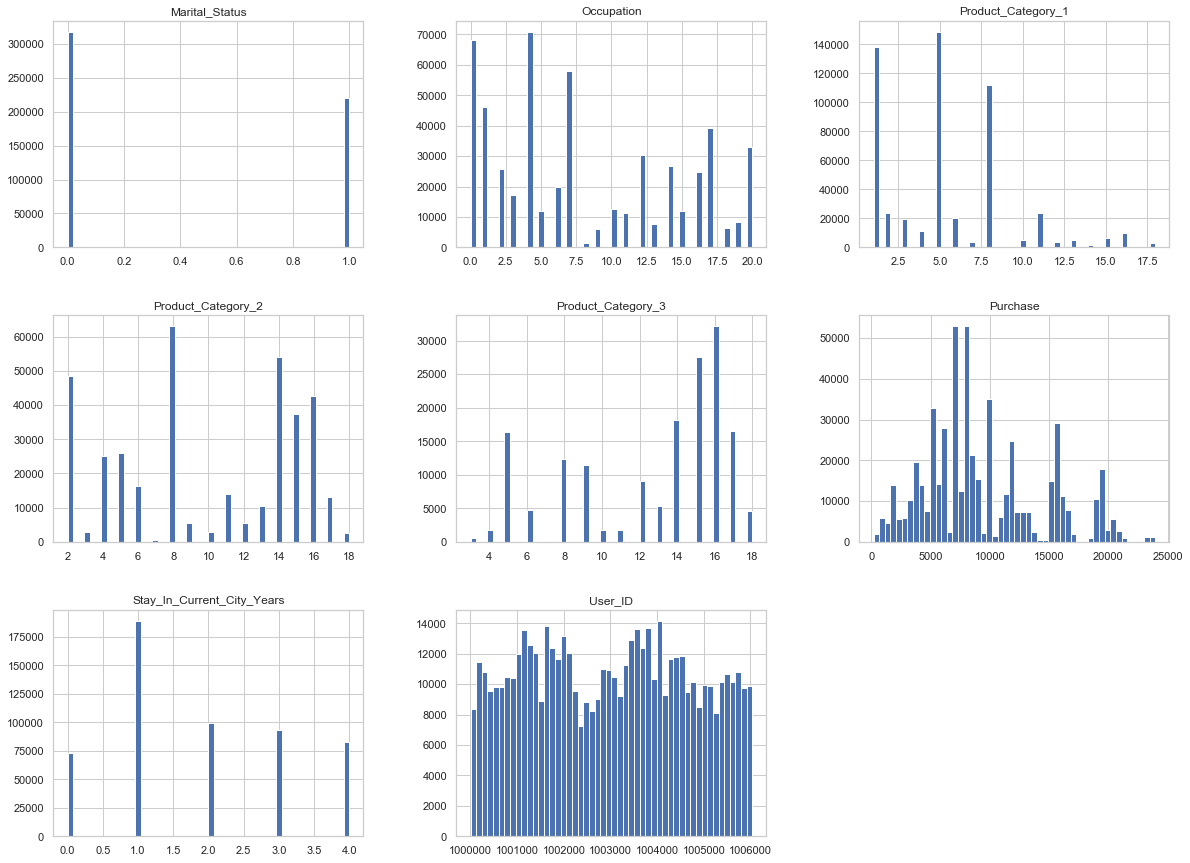

In [14]:
bf.hist(bins=50, figsize=(20,15))
plt.show()

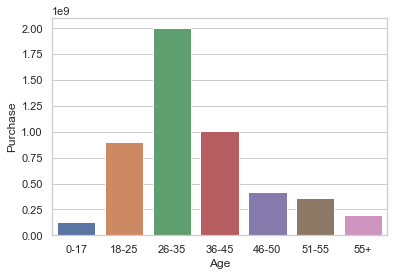

In [15]:
#Age / Purchase Relationship 
df_1=bf.groupby('Age').agg({'Purchase':'sum'})
df_1.reset_index(inplace=True)
ax = sns.barplot(x="Age", y="Purchase",data=df_1)


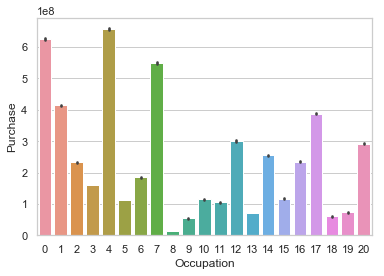

In [16]:
# Occupation / Purchase Relationship 
ax = sns.barplot(x="Occupation", y="Purchase", data=bf, estimator=sum)


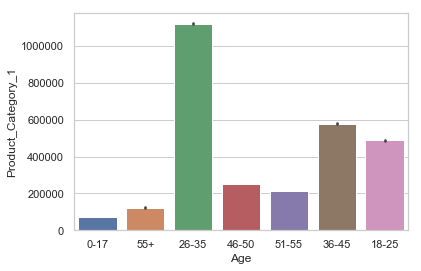

In [19]:
## Age / Product Category(i) Relationship, which product category preffered from whicg age group? 
ax = sns.barplot(x="Age", y="Product_Category_1", data=bf, estimator=sum)

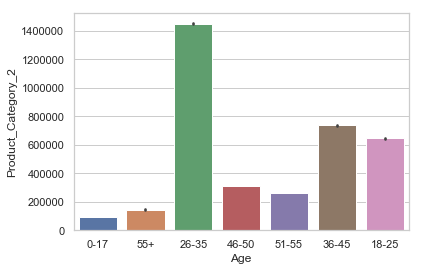

In [17]:
ax = sns.barplot(x="Age", y="Product_Category_2", data=bf, estimator=sum)


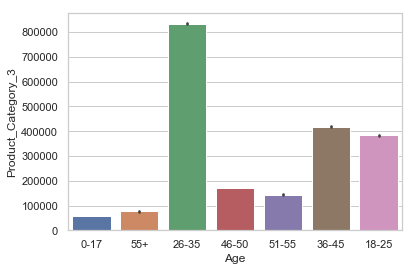

In [18]:
ax = sns.barplot(x="Age", y="Product_Category_3", data=bf, estimator=sum)

In [21]:
## combination of gender and marital status 
bf['combined_G_M'] = bf.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)


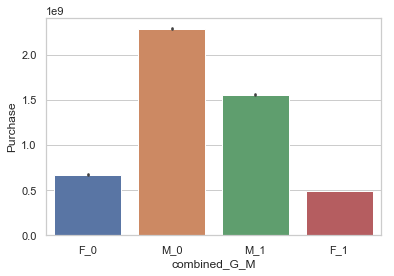

In [22]:
## affects of mariage and gender on purchase 
ax = sns.barplot(x="combined_G_M", y="Purchase", data=bf,  estimator=sum)


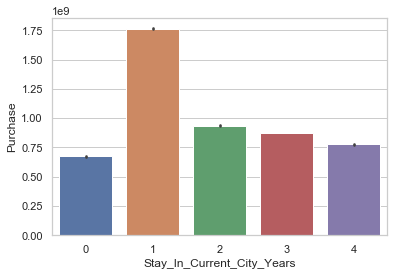

In [23]:
## number of years in city and purchase relat. 
ax = sns.barplot(x="Stay_In_Current_City_Years", y="Purchase", data=bf,  estimator=sum)


In [26]:
df_3 = bf.groupby('Product_ID').agg({'Purchase':'sum', 'Product_Category_1':'sum','Product_Category_2':'sum','Product_Category_3':'sum' })

df_3['%_of_product_on_purchase'] = df_3['Purchase'] / df_3['Purchase'].sum()
df_3.reset_index(inplace=True)
df_3['product_segments'] = df_3['%_of_product_on_purchase']
for val in enumerate(df_3.loc[ : , '%_of_product_on_purchase']):
     if val[1] > 0.003 :
         df_3.loc[val[0],'product_segments'] = 1
     if val[1] < 0.003 and val[1]>0.001:
         df_3.loc[val[0],'product_segments'] = 2
     if val[1] <0.001 and val[1]>0.0001 :
         df_3.loc[val[0],'product_segments'] = 3
     if val[1] < 0.0001 :
         df_3.loc[val[0],'product_segments'] = 4

# first 25 products generate 10% of total purchase 

df4 = df_3.sort_values('%_of_product_on_purchase',ascending=False).head(25)
df4


,Product_ID,Purchase,Product_Category_1,Product_Category_2,Product_Category_3,%_of_product_on_purchase,product_segments
249,P00025442,27532426,1586,3172.0,14274.0,0.005487,1.0
1014,P00110742,26382569,1591,3182.0,12728.0,0.005258,1.0
2441,P00255842,24652442,21664,0.0,0.0,0.004913,1.0
1743,P00184942,24060871,1424,11392.0,24208.0,0.004795,1.0
581,P00059442,23948299,8304,11072.0,22144.0,0.004773,1.0
1028,P00112142,23882624,1539,3078.0,21546.0,0.004760,1.0
1016,P00110942,23232538,1336,2672.0,0.0,0.004630,1.0
2261,P00237542,23096487,1374,20610.0,21984.0,0.004603,1.0
565,P00057642,22493690,1430,21450.0,22880.0,0.004483,1.0
104,P00010742,21865042,1331,10648.0,22627.0,0.004358,1.0


In [27]:
df4["%_of_product_on_purchase"].sum()


0.10403211186468728

In [28]:
## which customers are profitable? where they come from? 
# top 105 customer generates %10 of total purchase

df_5 = bf.groupby('User_ID').agg({'Purchase':'sum', 'Product_Category_1':'sum','Product_Category_2':'sum','Product_Category_3':'sum'})
df_5['%_of_product_on_purchase'] = df_5['Purchase'] / df_5['Purchase'].sum()

df_5.reset_index(inplace=True)
df_6 = df_5.sort_values('Purchase',ascending=False).head(105)
df_6

,User_ID,Purchase,Product_Category_1,Product_Category_2,Product_Category_3,%_of_product_on_purchase
4166,1004277,10536783,6107,5786.0,2662.0,0.002100
1634,1001680,8699232,6292,6135.0,2612.0,0.001734
2831,1002909,7577505,4304,5080.0,2338.0,0.001510
1885,1001941,6817493,5302,5542.0,2674.0,0.001359
416,1000424,6573609,4143,4293.0,2247.0,0.001310
4335,1004448,6565878,2999,4020.0,2349.0,0.001309
981,1001015,6511302,4922,4869.0,2023.0,0.001298
3297,1003391,6476786,3891,4091.0,1884.0,0.001291
1142,1001181,6387899,4919,5525.0,2589.0,0.001273
534,1000549,6310604,3671,4000.0,2002.0,0.001258


In [29]:
df_6["%_of_product_on_purchase"].sum()

0.10116443291183162

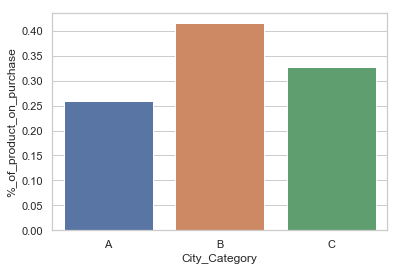

In [30]:
#  which city category makes the highest purchase? 

df_7= bf.groupby('City_Category').agg({'Purchase':'sum', 'Product_Category_1':'sum','Product_Category_2':'sum','Product_Category_3':'sum'})
df_7.reset_index(inplace=True)
df_7['%_of_product_on_purchase'] = df_7['Purchase'] / df_7['Purchase'].sum()

ax = sns.barplot(x="City_Category", y="%_of_product_on_purchase", data=df_7)

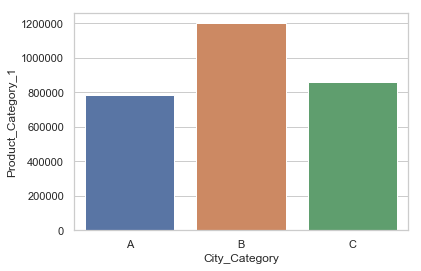

In [31]:
### WHİCH PRODUCT CATEGORIES PREFERRED BY each AGE GROUP AND CITY CATEGORIES? 
ax = sns.barplot(x="City_Category", y="Product_Category_1", data=df_7)


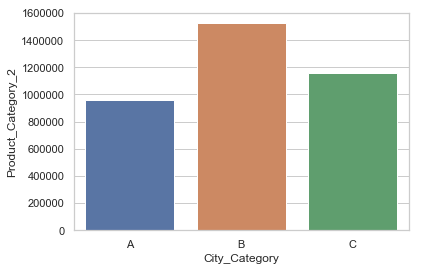

In [32]:
ax = sns.barplot(x="City_Category", y="Product_Category_2", data=df_7)


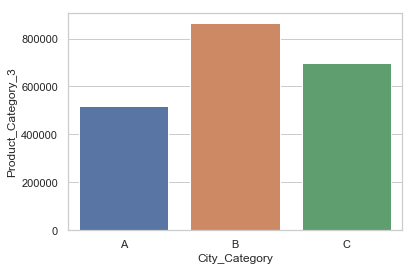

In [33]:
ax = sns.barplot(x="City_Category", y="Product_Category_3", data=df_7)


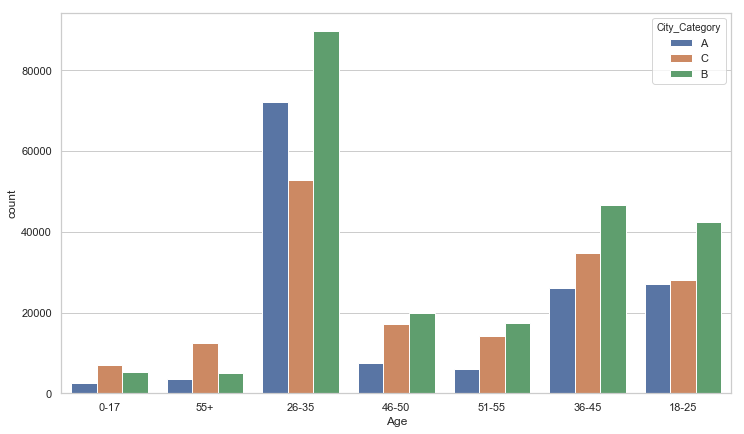

In [34]:
fig1, ax1 = plt.subplots(figsize=(12,7))
sns.countplot(bf['Age'],hue=bf['City_Category'])

In [38]:
# Which City_Category has the highest spending per person? 
#creating 3 different datasets for each city
# and missing values had been filled with zero. 
city_A = bf[bf["City_Category"] == "A" ]
city_B = bf[bf["City_Category"] == "B" ]
city_C = bf[bf["City_Category"] == "C" ]


city_A['Product_Category_2']= (city_A['Product_Category_2'].fillna(0))
city_B['Product_Category_2']= (city_B['Product_Category_2'].fillna(0))
city_C['Product_Category_2']= (city_C['Product_Category_2'].fillna(0))

city_A['Product_Category_3']= (city_A['Product_Category_3'].fillna(0))
city_B['Product_Category_3']= (city_B['Product_Category_3'].fillna(0))
city_C['Product_Category_3']= (city_C['Product_Category_3'].fillna(0))
city_A.isnull().sum()
city_B.isnull().sum()
city_C.isnull().sum()

C:\Users\ASUSNB\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\ASUSNB\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\ASUSNB\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
combined_G_M                  0
dtype: int64

In [39]:
# city A purchase amount / person. 
df_8 = city_A.groupby('User_ID').agg({'Purchase':'sum'})
df_8.reset_index(inplace=True)
avg_cityA_spending_per_person = city_A['Purchase'].sum()/ city_A['User_ID'].count()
print(avg_cityA_spending_per_person)


8958.011013703177


In [40]:
# city B purchase amount / person. 
df_9 = city_B.groupby('User_ID').agg({'Purchase':'sum'})
df_9.reset_index(inplace=True)
avg_cityB_spending_per_person = city_B['Purchase'].sum()/ city_B['User_ID'].count()
print(avg_cityB_spending_per_person)


9198.657848145418


In [41]:
# city C purchase amount / person. 
df_10 =city_C.groupby('User_ID').agg({'Purchase':'sum'})
df_10.reset_index(inplace=True)
avg_cityC_spending_per_person = city_C['Purchase'].sum()/ city_C['User_ID'].count()
print(avg_cityC_spending_per_person)

9844.44185501604


In [45]:
df_11 = bf.groupby('Product_ID').agg({'Purchase':'sum', 'Product_Category_1':'sum'})
df_12 = bf.groupby('Product_ID').agg({'Purchase':'sum', 'Product_Category_2':'sum'})
df_13 = bf.groupby('Product_ID').agg({'Purchase':'sum', 'Product_Category_3':'sum'})


Text(0.5,1,'Product Category 3 & Sales Relationship ')

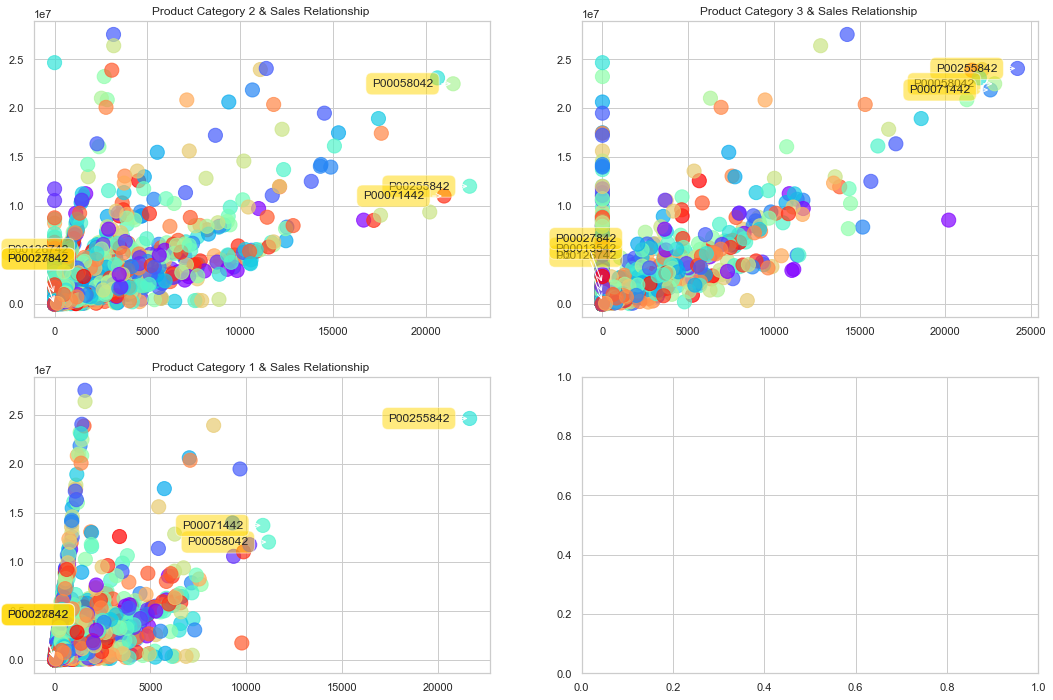

In [47]:
fig, ax = plt.subplots(2,2, figsize=(18,12))
 
labels_max = df_11.sort_values(by='Product_Category_1', ascending=False).head(3) # find label for top 7 types for attack=
labels_min = df_11.sort_values(by='Product_Category_1', ascending=True).head(3) # find label for last 3 types for attack
label_high = labels_max.index.tolist()
label_low = labels_min.index.tolist()


ax[1,0].scatter(x=df_11['Product_Category_1'], y=df_11['Purchase'],s=200,label=df_11.index, c=rb, alpha=0.7)
for label, x, y in zip(label_high, labels_max['Product_Category_1'], labels_max['Purchase']):
    ax[1,0].annotate(
        label, xy=(x, y), xytext=(-20, -5), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, a, b in zip(label_low, labels_min['Product_Category_1'], labels_min['Purchase']):
    ax[1,0].annotate(
        label, xy=(a, b), xytext=(14, 40), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[1,0].set_title('Product Category 1 & Sales Relationship ')

##################################
labels_max_2 = df_12.sort_values(by='Product_Category_2', ascending=False).head(3) # find label for top 7 types for attack=
labels_min_2 = df_12.sort_values(by='Product_Category_2', ascending=True).head(3) # find label for last 3 types for attack
label_high_2 = labels_max.index.tolist()
label_low_2 = labels_min.index.tolist()


ax[0,0].scatter(x=df_12['Product_Category_2'], y=df_12['Purchase'],s=200,label=df_12.index, c=rb, alpha=0.7)
for label, x, y in zip(label_high_2, labels_max_2['Product_Category_2'], labels_max_2['Purchase']):
    ax[0,0].annotate(
        label, xy=(x, y), xytext=(-20, -5), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, a, b in zip(label_low_2, labels_min_2['Product_Category_2'], labels_min_2['Purchase']):
    ax[0,0].annotate(
        label, xy=(a, b), xytext=(14, 40), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[0,0].set_title('Product Category 2 & Sales Relationship ')

########################################
labels_max_3 = df_13.sort_values(by='Product_Category_3', ascending=False).head(5) # find label for top 7 types for attack=
labels_min_3 = df_13.sort_values(by='Product_Category_3', ascending=True).head(5) # find label for last 3 types for attack
label_high_3 = labels_max.index.tolist()
label_low_3 = labels_min.index.tolist()


ax[0,1].scatter(x=df_13['Product_Category_3'], y=df_13['Purchase'],s=200,label=df_13.index, c=rb, alpha=0.7)
for label, x, y in zip(label_high_3, labels_max_3['Product_Category_3'], labels_max_3['Purchase']):
    ax[0,1].annotate(
        label, xy=(x, y), xytext=(-20, -5), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
for label, a, b in zip(label_low_3, labels_min_3['Product_Category_3'], labels_min_3['Purchase']):
    ax[0,1].annotate(
        label, xy=(a, b), xytext=(14, 40), textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='gold', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
ax[0,1].set_title('Product Category 3 & Sales Relationship ')


In [48]:
bf['is_duplicated'] = bf.duplicated(['User_ID'])

non_dup_df= bf[bf["is_duplicated"] == False ]
non_dup_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5891 entries, 0 to 243533
Data columns (total 14 columns):
User_ID                       5891 non-null int64
Product_ID                    5891 non-null object
Gender                        5891 non-null object
Age                           5891 non-null object
Occupation                    5891 non-null int64
City_Category                 5891 non-null object
Stay_In_Current_City_Years    5891 non-null int64
Marital_Status                5891 non-null int64
Product_Category_1            5891 non-null int64
Product_Category_2            4097 non-null float64
Product_Category_3            1914 non-null float64
Purchase                      5891 non-null int64
combined_G_M                  5891 non-null object
is_duplicated                 5891 non-null bool
dtypes: bool(1), float64(2), int64(6), object(5)
memory usage: 650.1+ KB


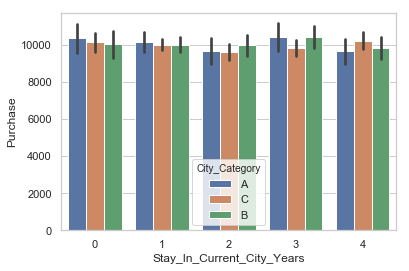

In [49]:
ax = sns.barplot(x="Stay_In_Current_City_Years", y="Purchase", data=non_dup_df, hue = 'City_Category')


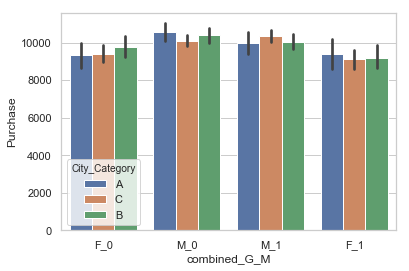

In [50]:
ax = sns.barplot(x="combined_G_M", y="Purchase", data=non_dup_df, hue = 'City_Category')


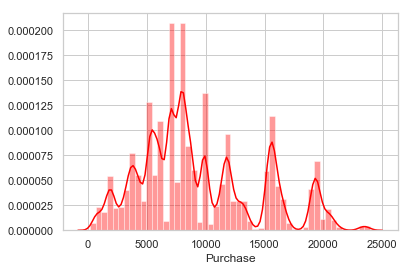

In [51]:
sns.distplot( bf["Purchase"] , color="red", label="Sales")


In [52]:
corr_matrix = bf.corr()
corr_matrix["Purchase"].sort_values(ascending=False)

Purchase                      1.000000
Occupation                    0.021104
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
is_duplicated                -0.013892
Product_Category_3           -0.022257
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64

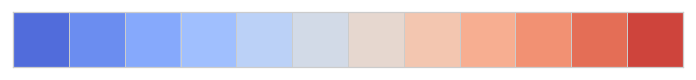

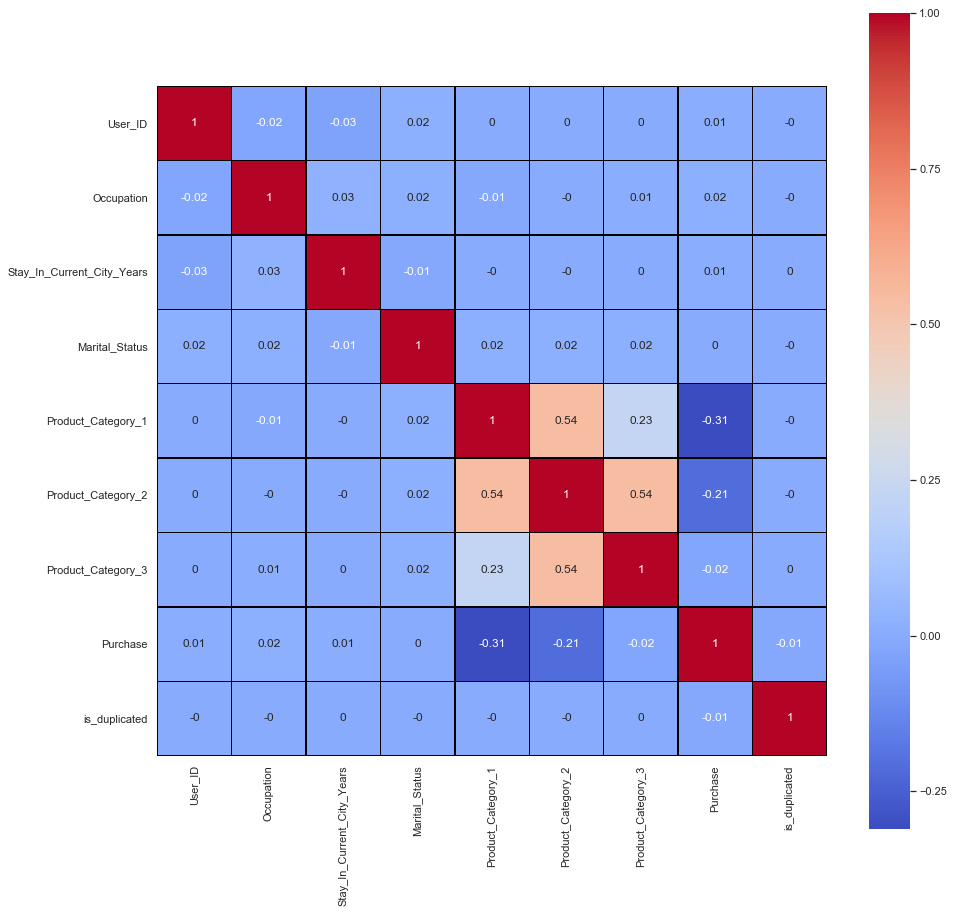

In [53]:
df_corr = bf.corr().round(2)
sns.palplot(sns.color_palette('coolwarm', 12))
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.5)
plt.show()